<a href="https://colab.research.google.com/github/gesiele-vaz/clusterizacao-clientes-ecommerce/blob/main/segmentacao_clientes_ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise Compartamental de Clientes**

Objetivo: Verificar e obter melhor conhecimento sobre o perfil do cliente de uma loja de e-commerce.

Dados: conjunto de dados transnacional que contém todas as transações ocorridas entre 01/12/2010 e 09/12/2011, possui informações de transações de compras em 38 países e territórios, com mais de 4.000 clientes únicos e mais de 540.000 transações.

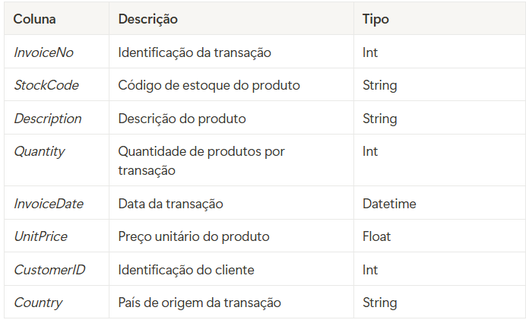




---



In [ ]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#load dataset
from google.colab import drive
drive.mount('/content/drive')

caminho_arquivo = '/content/drive/My Drive/data.csv'

df = pd.read_csv(caminho_arquivo, encoding='latin-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---



Análise Exploratória

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
#transformação de dados - coluna CustomerID
df['CustomerID'] = df['CustomerID'].astype(object)

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#verificação de dados nulos
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
#remoção de dados nulos
df.dropna(subset=['Description'])
df.dropna(subset=['InvoiceDate'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
#verificação de dados duplicados
df.duplicated().sum()

5268

In [ ]:
#remoção dos dados duplicados
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France




---



In [ ]:
#verificação de outliers
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df['UnitPrice'] < limite_inferior) | (df['UnitPrice'] > limite_superior)]
print(outliers)

       InvoiceNo StockCode                      Description  Quantity  \
16        536367     22622   BOX OF VINTAGE ALPHABET BLOCKS         2   
45        536370      POST                          POSTAGE         3   
65        536374     21258       VICTORIAN SEWING BOX LARGE        32   
141      C536379         D                         Discount        -1   
151       536382     22839  3 TIER CAKE TIN GREEN AND CREAM         2   
...          ...       ...                              ...       ...   
541768    581578      POST                          POSTAGE         3   
541786    581578     22622   BOX OF VINTAGE ALPHABET BLOCKS         6   
541831    581579     22941     CHRISTMAS LIGHTS 10 REINDEER         4   
541849    581580     22894    TABLECLOTH RED APPLES DESIGN          2   
541892    581586     21217    RED RETROSPOT ROUND CAKE TINS        24   

            InvoiceDate  UnitPrice  CustomerID         Country  
16       12/1/2010 8:34       9.95     13047.0  United Kin

In [ ]:
#remoção de outiliers
df_sem_outliers = df[(df['UnitPrice'] >= limite_inferior) & (df['UnitPrice'] <= limite_superior)]
print(df_sem_outliers)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID         Country  
0        1

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


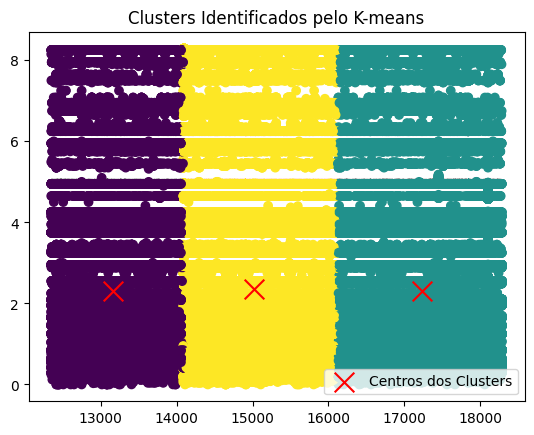

In [ ]:
# Clusterização com o K-means
X = df_sem_outliers[['CustomerID','UnitPrice']]

# Handling NaN values by removing rows containing NaN
X = X.dropna() # This line removes rows with any NaN values in 'CustomerID' or 'UnitPrice'

kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters, que é o que esperamos
kmeans.fit(X)

# Obter os rótulos de cada ponto e os centros dos clusters
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualizando os clusters resultantes
plt.scatter(X['CustomerID'], X['UnitPrice'], c=labels, cmap='viridis', marker='o')  # Dados coloridos pelos clusters
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centros dos Clusters')  # Centros
plt.title('Clusters Identificados pelo K-means')
plt.legend()
plt.show()

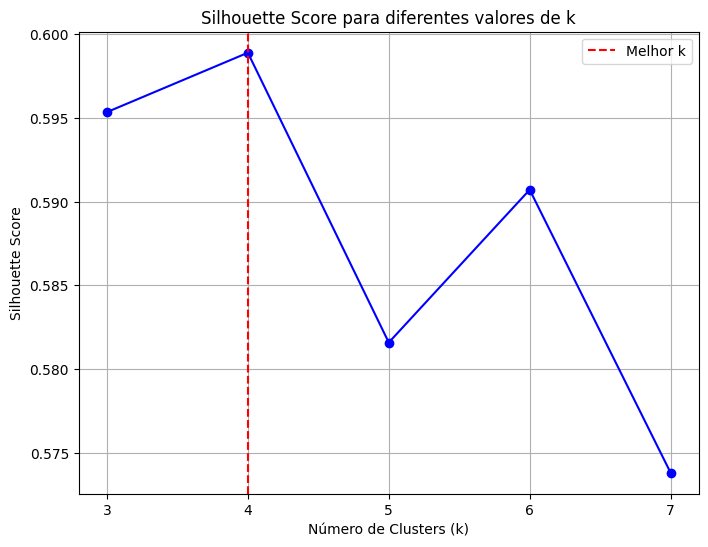

O número ideal de clusters (k) é: 4


In [ ]:
def calculate_silhouette_scores(X, k_range):
    silhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        score = silhouette_score(X, kmeans.labels_)
        silhouette_scores.append(score)
    return silhouette_scores

def plot_silhouette_scores(k_range, scores):
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, scores, marker='o', color='blue')
    plt.title('Silhouette Score para diferentes valores de k')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.xticks(k_range)
    plt.grid(True)
    plt.axvline(x=k_range[np.argmax(scores)], color='red', linestyle='--', label='Melhor k')
    plt.legend()
    plt.show()

# Definindo o intervalo de k
k_range = range(3, 8)

# Criando uma amostra dos dados
sample_size = 1000
if X.shape[0] > sample_size:
    indices = np.random.choice(X.shape[0], sample_size, replace=False)
    X_sample = X.iloc[indices]
else:
    X_sample = X

# Calculando os Silhouette Scores
silhouette_scores = calculate_silhouette_scores(X_sample, k_range)

# Plotando os resultados
plot_silhouette_scores(k_range, silhouette_scores)

# Encontrando o melhor k
best_k = k_range[np.argmax(silhouette_scores)]
print(f'O número ideal de clusters (k) é: {best_k}')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


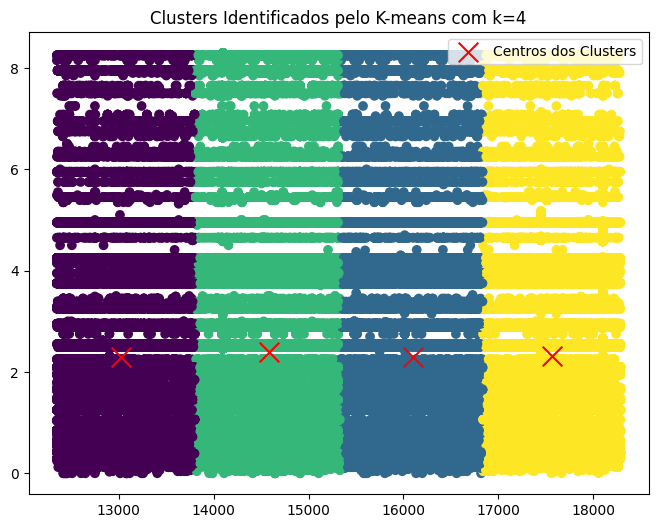

In [ ]:
#Aplicando K-means com o número ideal de clusters (best_k)
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
kmeans_final.fit(X)

# Visualizando os clusters resultantes
plt.figure(figsize=(8, 6))
# Accessing columns using their names instead of NumPy-style indexing
plt.scatter(X['CustomerID'], X['UnitPrice'], c=kmeans_final.labels_, cmap='viridis', marker='o')
plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centros dos Clusters')
plt.title(f'Clusters Identificados pelo K-means com k={best_k}')
plt.legend()
plt.show()

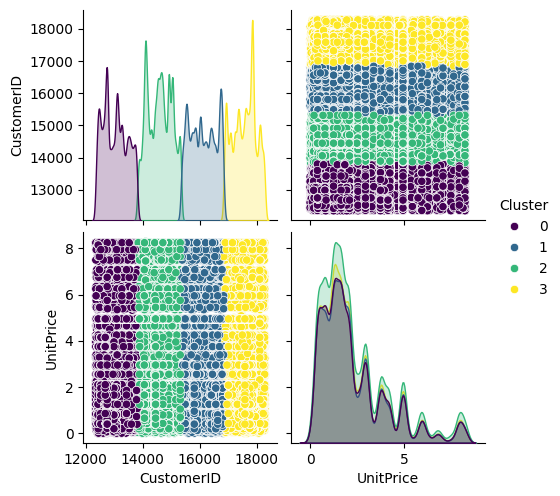

In [ ]:
# Análise de clusters
df_rfm_clustered = X.copy()
df_rfm_clustered['Cluster'] = kmeans_final.labels_

# Visualizando as relações entre as variáveis usando pairplot
sns.pairplot(df_rfm_clustered, hue='Cluster', palette='viridis')
plt.show()

<ipython-input-40-f809fc09049a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='UnitPrice', data=df_rfm_clustered, palette='viridis')


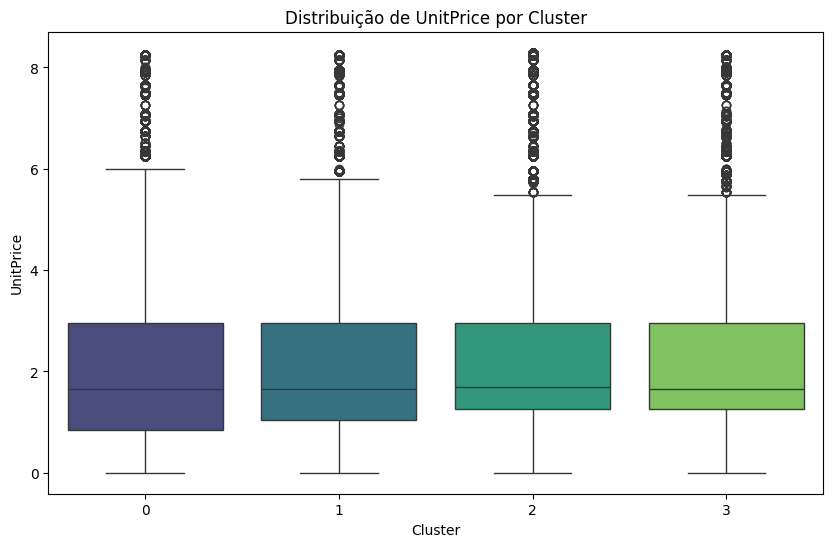

In [ ]:
# Distribuições de 'UnitPrice' por Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='UnitPrice', data=df_rfm_clustered, palette='viridis')
plt.title('Distribuição de UnitPrice por Cluster')
plt.show()



---



**Considerações da análise**

*Perfis de Compras por Cluster*
- Cluster 1: Clientes Fiéis (Alta Frequência, Alto Gasto)

Comportamento: Compram com frequência e gastam alto.
Ações de Marketing: Programas de fidelização, ofertas exclusivas, acesso antecipado para produtos.

- Cluster 2: Clientes Inativos (Baixa Frequência, Baixo Gasto)

Comportamento: Compram pouco e gastam baixo.
Ações de Marketing: ações reegajamento com descontos, ofertas de produtos baratos, propor frete grátis.

- Cluster 3: Clientes de Alto Gasto, Baixa Frequência

Comportamento: Gastam alto quando compram, mas comprando pouco.
Ações de Marketing: Promoções em produtos caros, vendas sazonais, campanhas fechadas.

- Cluster 4: Clientes Baixo Gasto e Baixa Frequência

Comportamento: Compram pouco e gastam baixo.
Ações de Marketing: Descontos agressivos, promoções "leve 2 por 1", ofertas de baixo custo para couplett upsell.



---



*Utilidade para Segmentação e marketing*

Personalização: Aumentar as chances de conversão a partir de campanhas de marketing mais relevantes e dirigidas para cada grupo de clientes.

Eficiência: Maximizar o retorno sobre o investimento, alocando recursos de forma mais estratégica e adiantando os clientes com maior potencial de lucro.

Reengajhamento: Estratégias específicas que podem recuperar clientes inativos e aumentar a frequência de compra.



---



*Sugestões de Ações de Marketing*

Clientes Fiéis: Fidelização com benefícios exclusivos e campanhas customizadas.
Clientes Inativos: Ofertas reagindo com descontos e frete grátis.
Clientes de Alto Gasto: Promoções de alto valor e acesso a produtos exclusivos.
Clientes de Baixo Gasto: Promoções agressivas e ofertas de brindes.